Using
LOWER LOGARITHMIC regression trendline as support
fib retraceent and tbo resistance
stochastic vs rsi
Doublebottom against bitcoin
100d moving average
20wk sma 21wk ema
bull market bands
btc extend 35-45% over the 20 ma
if usdt gets rejected from 4.2 - 5 percent -> ath
Mvrvz - btc top 

This code defines a CryptoDataProcessor class that fetches and processes cryptocurrency price data using Yahoo Finance. 
It also calculates technical indicators like RSI, MACD, and moving averages, tracks days since a Bitcoin halving event, 
saves processed data to CSV files, and visualizes key metrics.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import os
import matplotlib.pyplot as plt


class CryptoDataProcessor:
    def __init__(self, assets, start_date, end_date):
        """
        Initialize the data processor with asset list and date range.
        """
        self.assets = assets
        self.start_date = start_date
        self.end_date = end_date
        self.data = {}

    def fetch_data(self):
        """
        Fetch historical price data for the assets using Yahoo Finance.
        """
        for asset in self.assets:
            print(f"Fetching data for {asset}...")
            self.data[asset] = yf.download(asset, start=self.start_date, end=self.end_date)

    def calculate_rsi(self, series, length=14):
        """
        Calculate Relative Strength Index (RSI).
        """
        delta = series.diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        avg_gain = gain.rolling(window=length, min_periods=1).mean()
        avg_loss = loss.rolling(window=length, min_periods=1).mean()
        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    def calculate_macd(self, series, fast=12, slow=26, signal=9):
        """
        Calculate MACD and Signal line.
        """
        ema_fast = series.ewm(span=fast, adjust=False).mean()
        ema_slow = series.ewm(span=slow, adjust=False).mean()
        macd = ema_fast - ema_slow
        signal_line = macd.ewm(span=signal, adjust=False).mean()
        return macd, signal_line

    def add_technical_indicators(self):
        """
        Add technical indicators (RSI, MACD, Moving Averages) to the data.
        """
        for asset, df in self.data.items():
            print(f"Adding indicators for {asset}...")
            # RSI
            df['RSI'] = self.calculate_rsi(df['Close'])
            # MACD
            df['MACD'], df['Signal'] = self.calculate_macd(df['Close'])
            # Moving Averages
            df['100D_SMA'] = df['Close'].rolling(window=100).mean()
            df['20W_SMA'] = df['Close'].rolling(window=140).mean()  # ~20 weeks
            df['21W_EMA'] = df['Close'].ewm(span=147, adjust=False).mean()

    def add_days_post_halving(self, halving_dates):
        """
        Add days since the last halving for Bitcoin or other assets.
        """
        halving_dates = [datetime.strptime(date, '%Y-%m-%d') for date in halving_dates]
        for asset, df in self.data.items():
            print(f"Adding days post-halving for {asset}...")
            df['Days_Post_Halving'] = df.index.map(lambda x: self.calculate_days_since_halving(x, halving_dates))

    @staticmethod
    def calculate_days_since_halving(date, halving_dates):
        """
        Calculate days since the last halving.
        """
        for halving in reversed(halving_dates):
            if date >= halving:
                return (date - halving).days
        return np.nan

    def save_to_csv(self, output_dir):
        """
        Save processed data to CSV files without scaling.
        """
        # Create the output directory if it doesn't exist
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"Created directory: {output_dir}")
        
        # Save each asset's data to a CSV file without scaling
        for asset, df in self.data.items():
            output_path = f"{output_dir}/{asset}_processed.csv"
            df.to_csv(output_path)
            print(f"Saved processed data for {asset} to {output_path}")

    def get_data(self):
        """
        Return the processed data as a dictionary.
        """
        return self.data

    def visualize_technical_indicators(self, asset):
        """
        Visualize the technical indicators (RSI, MACD, Moving Averages).
        """
        df = self.data.get(asset)
        if df is None:
            print(f"No data found for {asset}")
            return

        # Plot Closing Price and Moving Averages
        plt.figure(figsize=(14, 7))
        plt.subplot(2, 1, 1)
        plt.plot(df['Close'], label='Close Price', color='black', linewidth=1.2)
        plt.plot(df['100D_SMA'], label='100-day SMA', color='blue', linestyle='--')
        plt.plot(df['20W_SMA'], label='20-week SMA', color='green', linestyle='--')
        plt.plot(df['21W_EMA'], label='21-week EMA', color='red', linestyle='--')
        plt.title(f'{asset} Closing Price and Moving Averages')
        plt.legend()

        # Plot RSI
        plt.subplot(2, 1, 2)
        plt.plot(df['RSI'], label='RSI', color='orange', linewidth=1.2)
        plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
        plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
        plt.title(f'{asset} RSI')
        plt.legend()

        # Plot MACD and Signal Line
        plt.figure(figsize=(14, 7))
        plt.plot(df['MACD'], label='MACD', color='blue', linewidth=1.2)
        plt.plot(df['Signal'], label='Signal Line', color='red', linewidth=1.2)
        plt.title(f'{asset} MACD and Signal Line')
        plt.legend()

        plt.tight_layout()
        plt.show()


Fetching data for BTC-USD...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for SOL-USD...
Fetching data for XRP-USD...
Fetching data for GALA-USD...


[*********************100%***********************]  1 of 1 completed


Adding indicators for BTC-USD...
Adding indicators for SOL-USD...
Adding indicators for XRP-USD...
Adding indicators for GALA-USD...
Adding days post-halving for BTC-USD...
Adding days post-halving for SOL-USD...
Adding days post-halving for XRP-USD...
Adding days post-halving for GALA-USD...
Saved processed data for BTC-USD to ./processed_data/BTC-USD_processed.csv
Saved processed data for SOL-USD to ./processed_data/SOL-USD_processed.csv
Saved processed data for XRP-USD to ./processed_data/XRP-USD_processed.csv
Saved processed data for GALA-USD to ./processed_data/GALA-USD_processed.csv


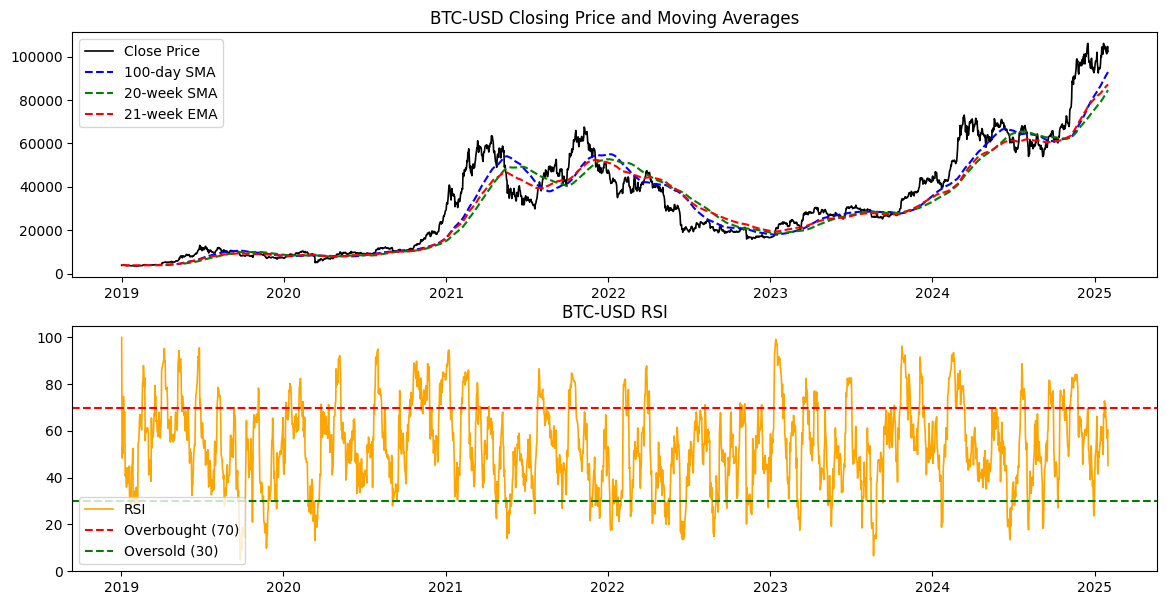

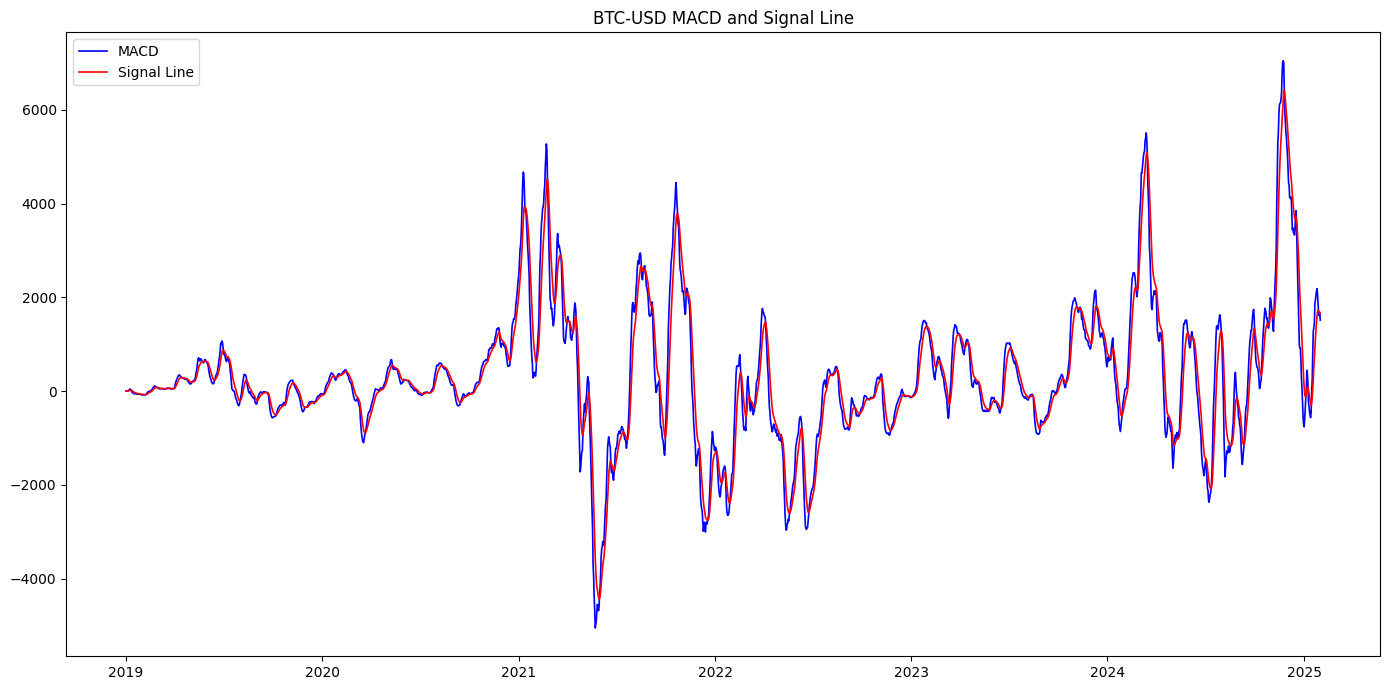

In [2]:
if __name__ == "__main__":
    # Define assets and date range
    assets = ['BTC-USD', 'SOL-USD', 'XRP-USD', 'GALA-USD']
    start_date = '2019-01-01'
    end_date = datetime.today().strftime('%Y-%m-%d')
    halving_dates = ["2012-11-28", "2016-07-09", "2020-05-11", "2024-04-20"]

   # Initialize and process data
    processor = CryptoDataProcessor(assets, start_date, end_date)
    processor.fetch_data()
    processor.add_technical_indicators()
    processor.add_days_post_halving(halving_dates)

    # Save unscaled data
    processor.save_to_csv(output_dir="./processed_data")

    # Visualize data for BTC-USD
    processor.visualize_technical_indicators('BTC-USD')


 This is a crypto price analysis and prediction pipeline using technical indicators, machine learning (Random Forest), and deep learning (LSTM neural networks). It generates synthetic crypto price data, applies indicators like RSI and MACD, makes short-term predictions using a Random Forest classifier, and then trains an LSTM model for price forecasting.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

class CryptoDataProcessor:
    def __init__(self, assets, start_date, end_date):
        self.assets = assets
        self.start_date = start_date
        self.end_date = end_date
        self.data = {}

    def fetch_data(self):
        for asset in self.assets:
            df = self.mock_fetch_data(asset)
            self.data[asset] = df

    def mock_fetch_data(self, asset):
        date_range = pd.date_range(self.start_date, self.end_date, freq='H')
        data = {
            'Date': date_range,
            'Close': np.random.randn(len(date_range)) * 100 + 5000
        }
        df = pd.DataFrame(data)
        df.set_index('Date', inplace=True)
        return df

    def add_technical_indicators(self):
        for asset, df in self.data.items():
            delta = df['Close'].diff()
            gain = (delta.where(delta > 0, 0)).fillna(0)
            loss = (-delta.where(delta < 0, 0)).fillna(0)

            avg_gain = gain.rolling(window=14).mean()
            avg_loss = loss.rolling(window=14).mean()

            rs = avg_gain / avg_loss
            df['RSI'] = 100 - (100 / (1 + rs))

            short_ema = df['Close'].ewm(span=12, adjust=False).mean()
            long_ema = df['Close'].ewm(span=26, adjust=False).mean()
            df['MACD'] = short_ema - long_ema
            df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

            df['Bearish'] = 0
            df.loc[(df['RSI'] > 70) & (df['MACD'] < df['Signal']), 'Bearish'] = 1

            df['Price_Change'] = df['Close'].pct_change() * 100
            df['Price_Change_1h'] = df['Price_Change'].shift(1)

            df.dropna(inplace=True)

            X = df[['RSI', 'MACD', 'Price_Change_1h']]
            y = df['Bearish']

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            clf = RandomForestClassifier(n_estimators=100, random_state=42)
            clf.fit(X_train, y_train)

            y_pred = clf.predict(X_test)
            print(f"Classification report for {asset}:\n", classification_report(y_test, y_pred))

            df['RF_Prediction'] = clf.predict(X)
            self.prepare_data_for_lstm(df)

    def prepare_data_for_lstm(self, df):
        features = ['Close', 'RF_Prediction']
        X = df[features].values
        Y = df['Close'].shift(-1).dropna().values
        X = X[:-1]

        scaler_X = MinMaxScaler(feature_range=(0, 1))
        X_scaled = scaler_X.fit_transform(X)

        scaler_Y = MinMaxScaler(feature_range=(0, 1))
        Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1))

        time_step = 60
        X_lstm, Y_lstm = self.create_lstm_dataset(X_scaled, Y_scaled, time_step)

        train_size = int(len(X_lstm) * 0.8)
        X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
        Y_train, Y_test = Y_lstm[:train_size], Y_lstm[train_size:]

        self.train_lstm_model(X_train, Y_train, X_test, Y_test, scaler_Y)

    def create_lstm_dataset(self, X, Y, time_step):
        X_data, Y_data = [], []
        for i in range(len(X) - time_step):
            X_data.append(X[i:i + time_step])
            Y_data.append(Y[i + time_step, 0])
        return np.array(X_data), np.array(Y_data)

    def train_lstm_model(self, X_train, Y_train, X_test, Y_test, scaler_Y):
        model = Sequential()
        model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(LSTM(units=50, return_sequences=False))
        model.add(Dense(units=1))

        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

        predicted_prices = model.predict(X_test)
        predicted_prices = scaler_Y.inverse_transform(predicted_prices)
        actual_prices = scaler_Y.inverse_transform(Y_test)

        plt.plot(actual_prices, color='blue', label='Actual Prices')
        plt.plot(predicted_prices, color='red', label='Predicted Prices')
        plt.title('BTC-USD Price Prediction with LSTM')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

        from sklearn.metrics import mean_squared_error
        mse = mean_squared_error(actual_prices, predicted_prices)
        print(f'Mean Squared Error: {mse}')

    def visualize_technical_indicators(self, asset):
        df = self.data[asset]
        
        fig, ax = plt.subplots(3, 1, figsize=(10, 8))
        
        ax[0].plot(df.index, df['Close'], label='Close Price', color='blue')
        ax[0].set_title(f'{asset} - Close Price')
        ax[0].set_ylabel('Price')
        
        ax[1].plot(df.index, df['RSI'], label='RSI', color='orange')
        ax[1].axhline(70, color='red', linestyle='--')
        ax[1].axhline(30, color='green', linestyle='--')
        ax[1].set_title(f'{asset} - RSI (Hourly)')
        ax[1].set_ylabel('RSI')
        
        ax[2].plot(df.index, df['MACD'], label='MACD', color='green')
        ax[2].plot(df.index, df['Signal'], label='Signal', color='red')
        ax[2].set_title(f'{asset} - MACD (Hourly)')
        ax[2].set_ylabel('MACD')
        
        plt.tight_layout()
        plt.show()

# Example usage
assets = ['BTC-USD']
start_date = '2023-01-01'
end_date = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

processor = CryptoDataProcessor(assets, start_date, end_date)
processor.fetch_data()
processor.add_technical_indicators()
processor.visualize_technical_indicators('BTC-USD')


ModuleNotFoundError: No module named 'tensorflow'

In [11]:
!python --version

Python 3.13.1
